> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Movie) - Omar Alomairi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

I selected the TMDB Movie dataset for analysis, which contains a movies list from the database with details of each released movies in order to investigate the data and create multiple questions then to discover how the data can be used to answer these questions.

1. What are five movies recorded highest grossing since day release?
2. What are five movies with the highest number of votes?
3. What is the distrubtion of top ten movies?


In [1405]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import json

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

First, I download the datasets from kaggle as csv files, then I import the two versions of datasets to Jupyter Notebook, then  I combined the dataframes.

#### Access First Dataframe 

In [1406]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Access Second Dataframe 

In [1407]:
df2 = pd.read_csv('tmdb_5000_credits.csv')
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Merging  The Dataframe

In [1408]:
df = df1.merge(df2, on='title')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

#### How many rows and columns? 

In [1409]:
df.shape

(4809, 23)

##### Our data contains of 4809 movies listed with 23 columns

#### Discover missing data and duplicate data 

In [1410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [1411]:
df.isnull().sum(axis=0)

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

##### Our data contains 3946 missing data

In [1412]:
df.duplicated().sum()

0

##### Our data contains 0 duplicate data

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### First, I will exclude a columns that are duplicate as title column and other useless columns

In [1413]:
df.drop(['title','homepage', 'keywords', 'original_language','spoken_languages','runtime','tagline','status','crew','production_countries', 'production_companies', 'cast'], axis=1, inplace=True)

In [1414]:
df.head()

,budget,genres,id,original_title,overview,popularity,release_date,revenue,vote_average,vote_count,movie_id
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,7.2,11800,19995
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,6.9,4500,285
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,6.3,4466,206647
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,7.6,9106,49026
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,6.1,2124,49529


##### Adjust the genres column values

In [1415]:
df["genres"] = df["genres"].apply(json.loads)
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])
df['genres'] = df['genres'].apply(pipe_flatten_names)

#### Second, Capitalize the first letter of the columns name.

In [1416]:
df.columns = df.columns.str.capitalize()

In [1417]:
df.head()

,Budget,Genres,Id,Original_title,Overview,Popularity,Release_date,Revenue,Vote_average,Vote_count,Movie_id
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,7.2,11800,19995
1,300000000,Adventure|Fantasy|Action,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,6.9,4500,285
2,245000000,Action|Adventure|Crime,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,6.3,4466,206647
3,250000000,Action|Crime|Drama|Thriller,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,7.6,9106,49026
4,260000000,Action|Adventure|Science Fiction,49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,6.1,2124,49529


##### Change column name 

In [1418]:
df.rename(columns={'Original_title':'Movie_name'}, inplace= True)

#### Third, Fill and remove missing data

In [1419]:
df.isna().sum()/len(df)*100.00

Budget          0.000000
Genres          0.000000
Id              0.000000
Movie_name      0.000000
Overview        0.062383
Popularity      0.000000
Release_date    0.020794
Revenue         0.000000
Vote_average    0.000000
Vote_count      0.000000
Movie_id        0.000000
dtype: float64

#### How many rows in Revenue column with 0 value? 

In [1420]:
(df['Revenue']==0).sum()

1430

##### Replace the 0 with nan values, in order to fill null values with the average of revenue.

In [1421]:
df['Revenue']= df['Revenue'].replace(0,np.nan)

In [1422]:
meanval1 = df['Revenue'].mean()

In [1423]:
df['Revenue'].fillna(value=meanval1, inplace=True)

I did not drop the rows because my anlysis will affect, and after I checked null values = zeros% so no need to drop it so I consider the zeros as null values so I replaced it to impute it to the average.

#### How many rows in Vote_average column with 0.0 value? 

In [1424]:
(df['Vote_average']==0.0).sum()

63

###### Replace the 0.0 with nan values, in order to fill null values with the average of vote.

In [1425]:
df['Vote_average']= df['Vote_average'].replace(0.0,np.nan)

In [1426]:
meanval2 = df['Vote_average'].mean()

In [1427]:
df['Vote_average'].fillna(value=meanval2, inplace=True)

I did not drop the rows because my anlysis will affect, and after I checked null values = zeros% also so no need to drop it so I consider the zeros as null values so I replaced it also to impute it to the average.

#### How many rows in Budget column with 0 value? 

In [1428]:
(df['Budget']==0).sum()

1039

###### Replace the 0 with nan values, in order to fill null values with the average of budget.

In [1429]:
df['Budget']= df['Budget'].replace(0,np.nan)

In [1430]:
meanval3 = df['Budget'].mean()

In [1431]:
df['Budget'].fillna(value=meanval3, inplace=True)

I did not drop the rows because I need the budget in order to compare it with the anlysis, and after I checked null values = zeros% so no need to drop it so I consider the zeros as null values so I replaced it to impute it to the average.

#### How many movies without voting?

In [1432]:
(df['Vote_count']==0).sum()

62

##### Drop rows with 0 vote count

In [1433]:
df.drop(df[df['Vote_count'] == 0].index, inplace = True)

I dropped it because, I will multiply the vote count by vote average to get the weighted voting.

##### Create a new column and assign values for weighted voting & today date

In [1434]:
df=df.assign(Weighted_voting=df['Vote_count']*df['Vote_average'])

In [1435]:
df=df.assign(Today_date='2022-10-18')

##### Calculate the days since date of movie released until today

In [1436]:
df[['Release_date','Today_date']] = df[['Release_date','Today_date']].apply(pd.to_datetime)
df['Day_since_release'] = (df['Today_date'] - df['Release_date']).dt.days

##### Fill missing data in Overview column

In [1437]:
df.isnull().sum(axis=0)

Budget               0
Genres               0
Id                   0
Movie_name           0
Overview             2
Popularity           0
Release_date         0
Revenue              0
Vote_average         0
Vote_count           0
Movie_id             0
Weighted_voting      0
Today_date           0
Day_since_release    0
dtype: int64

In [1438]:
df[df['Overview'].isnull()]

,Budget,Genres,Id,Movie_name,Overview,Popularity,Release_date,Revenue,Vote_average,Vote_count,Movie_id,Weighted_voting,Today_date,Day_since_release
2662,15000000.0,Drama,370980,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,2015-12-03,1.170941e+08,7.3,12,370980,87.6,2022-10-18,2511
4437,913000.0,Documentary,292539,Food Chains,NaN,0.795698,2014-04-26,1.170941e+08,7.4,8,292539,59.2,2022-10-18,3097


In [1439]:
df.at[2662,'Overview']='Following the rise of father Jorge Mario Bergoglio from his early life as a teacher in a Jesuit High School in Argentina, to archbishop and cardinal of Buenos Aires, until he was elected Pope of the Roman Catholic Church.'

In [1440]:
df.at[4437,'Overview']='To protest their working conditions and poor wages, farmworkers in Immokalee, Florida, start a hunger strike outside the headquarters of Publix supermarkets.'

In [1441]:
df.isnull().sum(axis=0)

Budget               0
Genres               0
Id                   0
Movie_name           0
Overview             0
Popularity           0
Release_date         0
Revenue              0
Vote_average         0
Vote_count           0
Movie_id             0
Weighted_voting      0
Today_date           0
Day_since_release    0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( What are five movies recorded highest grossing since day release? )

In [1442]:
df3 = df.nlargest(n=5, columns=['Revenue'])

In [1443]:
df3

,Budget,Genres,Id,Movie_name,Overview,Popularity,Release_date,Revenue,Vote_average,Vote_count,Movie_id,Weighted_voting,Today_date,Day_since_release
0,237000000.0,Action|Adventure|Fantasy|Science Fiction,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,7.2,11800,19995,84960.0,2022-10-18,4695
25,200000000.0,Drama|Romance|Thriller,597,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,1997-11-18,1.845034e+09,7.5,7562,597,56715.0,2022-10-18,9100
16,220000000.0,Science Fiction|Action|Adventure,24428,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1.519558e+09,7.4,11776,24428,87142.4,2022-10-18,3828
28,150000000.0,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,2015-06-09,1.513529e+09,6.5,8662,135397,56303.0,2022-10-18,2688
44,190000000.0,Action,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,2015-04-01,1.506249e+09,7.3,4176,168259,30484.8,2022-10-18,2757


[Text(0.5, 1.0, 'What are five movies recorded highest grossing since day release?')]

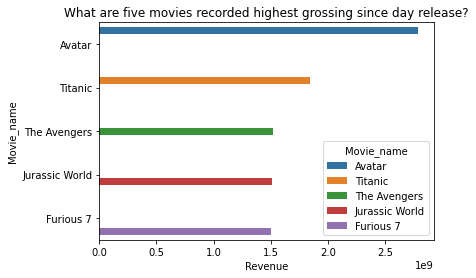

In [1444]:
sns.barplot(x='Revenue', y='Movie_name',hue='Movie_name', data=df3).set(title='What are five movies recorded highest grossing since day release?')


### Research Question 2  ( What are five movies with the highest number of votes?)

In [1445]:
df4 = df.nlargest(n=5, columns=['Vote_count'])

In [1446]:
df4

,Budget,Genres,Id,Movie_name,Overview,Popularity,Release_date,Revenue,Vote_average,Vote_count,Movie_id,Weighted_voting,Today_date,Day_since_release
96,160000000.0,Action|Thriller|Science Fiction|Mystery|Adventure,27205,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,2010-07-14,8.255328e+08,8.1,13752,27205,111391.2,2022-10-18,4479
65,185000000.0,Drama|Action|Crime|Thriller,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1.004558e+09,8.2,12002,155,98416.4,2022-10-18,5207
0,237000000.0,Action|Adventure|Fantasy|Science Fiction,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,7.2,11800,19995,84960.0,2022-10-18,4695
16,220000000.0,Science Fiction|Action|Adventure,24428,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1.519558e+09,7.4,11776,24428,87142.4,2022-10-18,3828
788,58000000.0,Action|Adventure|Comedy,293660,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,2016-02-09,7.831130e+08,7.4,10995,293660,81363.0,2022-10-18,2443


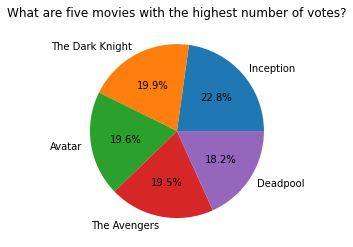

In [1451]:
x = df4.Vote_count
mylabels = df4.Movie_name
plt.pie(x, labels = mylabels, autopct = '%1.1f%%')
plt.title('What are five movies with the highest number of votes?')
plt.show() 

### Research Question 3  ( What is the distrubtion of top ten movies? )

In [1448]:
df5 = df.nlargest(n=10, columns=['Weighted_voting'])

In [1449]:
df5

,Budget,Genres,Id,Movie_name,Overview,Popularity,Release_date,Revenue,Vote_average,Vote_count,Movie_id,Weighted_voting,Today_date,Day_since_release
96,160000000.0,Action|Thriller|Science Fiction|Mystery|Adventure,27205,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,2010-07-14,8.255328e+08,8.1,13752,27205,111391.2,2022-10-18,4479
65,185000000.0,Drama|Action|Crime|Thriller,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1.004558e+09,8.2,12002,155,98416.4,2022-10-18,5207
95,165000000.0,Adventure|Drama|Science Fiction,157336,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,2014-11-05,6.751200e+08,8.1,10867,157336,88022.7,2022-10-18,2904
16,220000000.0,Science Fiction|Action|Adventure,24428,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,1.519558e+09,7.4,11776,24428,87142.4,2022-10-18,3828
0,237000000.0,Action|Adventure|Fantasy|Science Fiction,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,7.2,11800,19995,84960.0,2022-10-18,4695
788,58000000.0,Action|Adventure|Comedy,293660,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,2016-02-09,7.831130e+08,7.4,10995,293660,81363.0,2022-10-18,2443
287,100000000.0,Drama|Western,68718,Django Unchained,"With the help of a German bounty hunter, a fre...",82.121691,2012-12-25,4.253682e+08,7.8,10099,68718,78772.2,2022-10-18,3584
662,63000000.0,Drama,550,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,1.008538e+08,8.3,9413,550,78127.9,2022-10-18,8404
94,170000000.0,Action|Science Fiction|Adventure,118340,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,2014-07-30,7.733286e+08,7.9,9742,118340,76961.8,2022-10-18,3002
634,63000000.0,Action|Science Fiction,603,The Matrix,"Set in the 22nd century, The Matrix tells the ...",104.309993,1999-03-30,4.635174e+08,7.9,8907,603,70365.3,2022-10-18,8603


[Text(0.5, 1.0, 'What is the distrubtion of top ten movies?')]

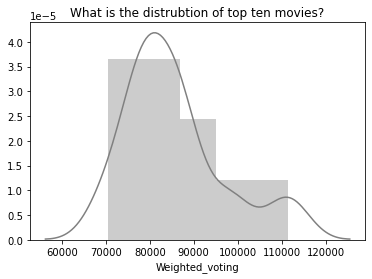

In [1450]:
sns.distplot(df5.Weighted_voting, color='grey').set(title='What is the distrubtion of top ten movies?')


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

##### Finally, summary of my finding of the TMDB movies dataset the Avatar movie is considerd the highest profit in first rank of 2.8B revenue, then Titanic in second rank of 1.85B revenue, The Avengres in third rank, of 1.5B revenue, Jurassic World in fourth rank of 1.5B revnue, and Furious 7 in fifth rank of 1.5B.

##### Inception movie is considerd the highest number of voting with 13752 vote (22.8%) in first rank, The Dark Knight in second rank with 12002 vote (19.9%), Avatar in third rank with 11800 vote(19.6%), The Avengers in fourth rank with 11776 vote (19.5%) , and  Deadpool in fifth rank with 10995 (18.2%).

###### The distrubtion of top ten movies the curve is begin low then high as we see from 70000 to 85000 the curve as bell shaped which as give a result near the average.

##### Regarding my limitations based on my knowlege is genres for each movies, because I have more than 4000 movies and most movies having multiple genres.